# Homework 1 
# Importing and Cleaning Data

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Stuff to read in the json
import json
import requests

#Silencing deprication warnings
import warnings
warnings.filterwarnings("ignore")

# Bikeshare Data
The first dataset I am going to look at is going to be metro bikeshare data.

In [2]:
#Import data
bike_data = pd.read_csv(r"C:\Users\nelso\OneDrive\Machine_Learning\HW1\metro-bike-share-trip-data.csv")

## Cleaning the Data
First we are going to clean the data so that it is ready to visualize. I am going to take a quick peek at the data and make sure we don't have any missing values and that none of the variables look funky!

In [34]:
#Take a quick look at the data and see what kind of data we have
print(bike_data.describe())

            Trip ID       Duration  Starting Station ID  \
count  1.307150e+05  130715.000000        130715.000000   
mean   1.145928e+07    1355.489577          3042.560341   
std    6.362769e+06    4674.172366            30.968528   
min    1.912818e+06      60.000000          3005.000000   
25%    5.060320e+06     360.000000          3024.000000   
50%    1.022443e+07     600.000000          3039.000000   
75%    1.709856e+07    1080.000000          3063.000000   
max    2.373246e+07   86400.000000          4108.000000   

       Starting Station Latitude  Starting Station Longitude  \
count              130715.000000               130715.000000   
mean                   34.039217                 -118.221174   
std                     0.532694                    1.849996   
min                     0.000000                 -118.472832   
25%                    34.044170                 -118.256980   
50%                    34.046822                 -118.250954   
75%                 

In [4]:
#Check how many rows in each column are null
bike_data.isna().sum()

Trip ID                           0
Duration                          0
Start Time                        0
End Time                          0
Starting Station ID              19
Starting Station Latitude        48
Starting Station Longitude       48
Ending Station ID                96
Ending Station Latitude        1051
Ending Station Longitude       1051
Bike ID                          10
Plan Duration                   766
Trip Route Category               0
Passholder Type                   0
Starting Lat-Long             33805
Ending Lat-Long                1051
dtype: int64

In [5]:
#Clean up the data getting rid of starting lat and longitude because there are so many missing rows. Also drop the rows that are missing any values
start_rows = bike_data.shape[0]
print("Number of observations before dropping bad rows:",start_rows)
bike_data = bike_data.drop("Starting Lat-Long", axis = 1)
bike_data = bike_data.dropna()
end_rows = bike_data.shape[0]
print ("Number of ovservations after dropping bad rows:", end_rows)
rows_lost = (start_rows-end_rows)/start_rows
print("This is acceptable because we are only losing",rows_lost ,"of our data")

Number of observations before dropping bad rows: 132427
Number of ovservations after dropping bad rows: 130715
This is acceptable because we are only losing 0.012927877245576808 of our data


In [6]:
#Check to make sure we took care of all of the null values
bike_data.isna().sum()

Trip ID                       0
Duration                      0
Start Time                    0
End Time                      0
Starting Station ID           0
Starting Station Latitude     0
Starting Station Longitude    0
Ending Station ID             0
Ending Station Latitude       0
Ending Station Longitude      0
Bike ID                       0
Plan Duration                 0
Trip Route Category           0
Passholder Type               0
Ending Lat-Long               0
dtype: int64

In [7]:
#Explore what the different data types are that we are working with
bike_data.dtypes

Trip ID                         int64
Duration                        int64
Start Time                     object
End Time                       object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Bike ID                       float64
Plan Duration                 float64
Trip Route Category            object
Passholder Type                object
Ending Lat-Long                object
dtype: object

## Exploring the Data
Okay now that the data is clean, we are going to explore it a little bit and see if we can find some differences in the groups we are working with. First, lets look at the distribution of the different types of customers.

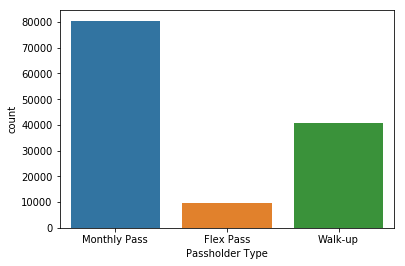

In [8]:
sns.countplot(bike_data["Passholder Type"])

There are clearly a lot more Monthly Pass users than any other group. So now let's look at the differences between the types of trips these customers are taking. 

In [9]:
#Write a quick function to plot our graph for us
def plot_category(df, user_type):
    new = df.loc[df['Passholder Type']== user_type]
    new = new['Trip Route Category']
    plot = sns.countplot(new)
    plot.set_title(user_type)
    plt.show()
    return

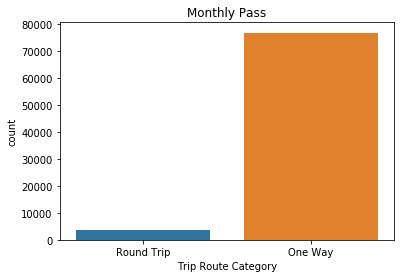

In [10]:
plot_category(bike_data, 'Monthly Pass')

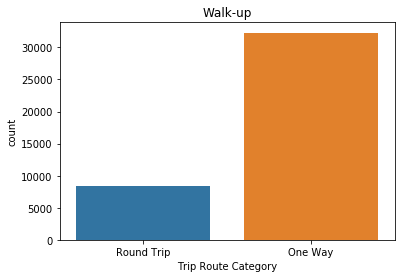

In [11]:
plot_category(bike_data, 'Walk-up')

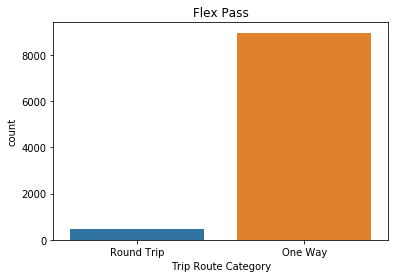

In [12]:
plot_category(bike_data, 'Flex Pass')

This gives us some interesting insights to our different types of customers. The proportion of round trips to one way trips is very different for walk-up customers compared to those that have some kind of pass. This could lead us to some interesting theories. Maybe people with passes use them to bike to work while those without use them more on vacations or for leisure. It definitely gives us some interesting things to consider.

One way we may be able to glean some more information is by looking at the duration of the average trip for each type of customer.

In [13]:
bike_data.groupby(by = ['Passholder Type'])['Duration'].mean()

Passholder Type
Flex Pass       1066.689225
Monthly Pass     777.000633
Walk-up         2565.802999
Name: Duration, dtype: float64

Here we find that the walk-up customers are taking much longer rides than the passholders using the bikeshare program. This is another great insight to how these groups are different and shows us how each type of customer utilizes the bikes. 

# Medical Insurance Data
We are going to clean and explore another dataset now from a json format.

In [42]:
#Read in excel file
insurance_data = pd.read_excel(r"C:\Users\nelso\OneDrive\Machine_Learning\HW1\Insurance_Data.xlsx")

In [43]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning
So the data looks like it was read in just fine. So now I am going to go ahead and check for any missing values and make a few changes to make the data nicer for us to visualize.

In [44]:
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Well that is great news! We have no missing values. The first thing I am going to do is change the sex and smokers variables to binary variables and create a new age variable putting them in bins before we start looking at some basic statistics and visualize our data

In [45]:
insurance_data.loc[insurance_data['sex']=='male', 'sex']=1
insurance_data.loc[insurance_data['sex']=='female', 'sex']=0
insurance_data.loc[insurance_data['smoker']=='yes', 'smoker']=1
insurance_data.loc[insurance_data['smoker']=='no', 'smoker']=0
insurance_data = insurance_data.rename(index=str, columns={"sex": "male"})

In [46]:
#Now we can see that our sex variable has been changed to a binary variable and renamed to make it more clear that a 1 signals
#a male and a 0 a female
insurance_data.head()

,age,male,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [47]:
#Seperate the ages and bmis into 4 groups
insurance_data['age_bins'] = pd.cut(insurance_data['age'], 4)
insurance_data['age_bins'].head()

0    (17.954, 29.5]
1    (17.954, 29.5]
2    (17.954, 29.5]
3      (29.5, 41.0]
4      (29.5, 41.0]
Name: age_bins, dtype: category
Categories (4, interval[float64]): [(17.954, 29.5] < (29.5, 41.0] < (41.0, 52.5] < (52.5, 64.0]]

In [48]:
insurance_data['bmi_bins'] = pd.cut(insurance_data['bmi'], 4)
insurance_data['bmi_bins'].head()

0    (25.252, 34.545]
1    (25.252, 34.545]
2    (25.252, 34.545]
3    (15.923, 25.252]
4    (25.252, 34.545]
Name: bmi_bins, dtype: category
Categories (4, interval[float64]): [(15.923, 25.252] < (25.252, 34.545] < (34.545, 43.838] < (43.838, 53.13]]

In [49]:
#Encode the ages from 0 to 3; 0 being the youngest age group of 18 to 29.5 and so on. Do the same for BMI
insurance_data.loc[insurance_data['age'] <= 29.5, 'age']=0
insurance_data.loc[(insurance_data['age'] > 29.5) & (insurance_data['age'] <= 41), 'age']=1
insurance_data.loc[(insurance_data['age'] > 41) & (insurance_data['age'] <= 52.5), 'age']=2
insurance_data.loc[insurance_data['age'] > 52.5, 'age']=3

insurance_data.loc[insurance_data['bmi'] <= 25.252, 'bmi']=0
insurance_data.loc[(insurance_data['bmi'] > 25.252) & (insurance_data['bmi'] <= 34.545), 'bmi']=1
insurance_data.loc[(insurance_data['bmi'] > 34.545) & (insurance_data['bmi'] <= 43.838), 'bmi']=2
insurance_data.loc[insurance_data['bmi'] > 43.838, 'bmi']=3
insurance_data.head()

,age,male,bmi,children,smoker,region,charges,age_bins,bmi_bins
0,0,0,1.0,0,1,southwest,16884.92400,"(17.954, 29.5]","(25.252, 34.545]"
1,0,1,1.0,1,0,southeast,1725.55230,"(17.954, 29.5]","(25.252, 34.545]"
2,0,1,1.0,3,0,southeast,4449.46200,"(17.954, 29.5]","(25.252, 34.545]"
3,1,1,0.0,0,0,northwest,21984.47061,"(29.5, 41.0]","(15.923, 25.252]"
4,1,1,1.0,0,0,northwest,3866.85520,"(29.5, 41.0]","(25.252, 34.545]"


# Exploring the Data
Now that we have made a few minor changes to our data to make it more machine learning friendly, we are going to explore it! We are going to investigate how age, gender, and smoking affect the amount people have to pay on medical bills.

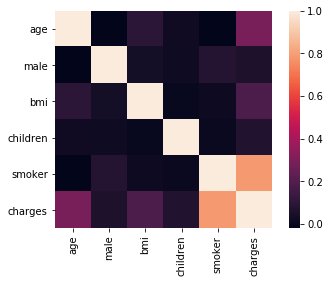

In [50]:
#First lets look at a heatmap to see what variables are most correlated, especially with charges
insurance_numerical = ['age', 'male', 'bmi', 'children', 'smoker', 'charges']
sns.heatmap(insurance_data[insurance_numerical].corr(), square = True)

Looking at the correlation map above, we see, unsurprisingly perhaps, that smoking has the highest correlation with the charges variable. So lets go ahead and look at how much of a difference there is in charges between the smokers and non smokers.

In [51]:
#Create a quick function for exploring the charges variable through the lens of other variables
def explore_charges(exploring_variable):
    print("The average charges for the groups of", exploring_variable,"are as follows:")
    print(insurance_data.groupby(exploring_variable)['charges'].mean())
    print("-"*100)
    print("The distribution of charges for the groups of", exploring_variable,"are as follows:")
    print(insurance_data['charges'].hist(by = insurance_data[exploring_variable]))

The average charges for the groups of smoker are as follows:
smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64
----------------------------------------------------------------------------------------------------
The distribution of charges for the groups of smoker are as follows:


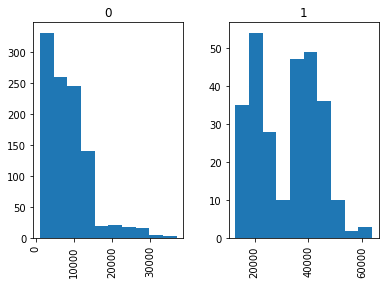

In [52]:
explore_charges('smoker')

We can see that the differences in charges for non-smokers and smokers is pretty big! We also can see that while the smokers do have a few observations up around the \$60,000 range, a ton of the charges for them were right around \$40,000. So it is pretty normal for smokers to be charged much more for their medical bills!

After smoking, BMI and age were the next two highest correlated variables with charges. So we are also going to take a quick look at what they have to show us! We will also take a look at if charges are different across different regions of the country too.

The average charges for the groups of region are as follows:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64
----------------------------------------------------------------------------------------------------
The distribution of charges for the groups of region are as follows:
[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000141E0471D68>


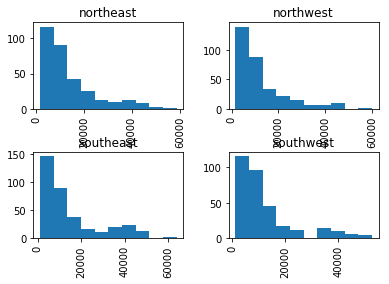

In [55]:
explore_charges('region')

These all look pretty similar. There isnt anything too crazy as far as differences go between the different regions. So let's move on to the other variables.

The average charges for the groups of bmi are as follows:
bmi
0.0    10288.171888
1.0    12642.395517
2.0    16892.764274
3.0    17143.542030
Name: charges, dtype: float64
----------------------------------------------------------------------------------------------------
The distribution of charges for the groups of bmi are as follows:
[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000141DC330208>


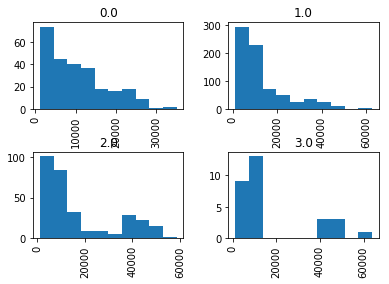

In [53]:
explore_charges('bmi')

The average charges for the groups of age are as follows:
age
0     9182.487125
1    11560.673428
2    15632.436584
3    18302.141642
Name: charges, dtype: float64
----------------------------------------------------------------------------------------------------
The distribution of charges for the groups of age are as follows:
[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000141E03DA278>


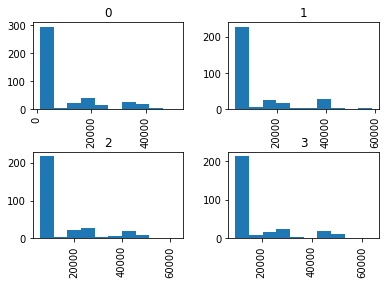

In [54]:
explore_charges('age')

The differences between bmi groups and age groups are what we might expect. As people get older and have a higher BMI, expenses go up. While we can see this upward trend, it is nowhere near the increases in charges that we see from smoking. So what is the moral of the story? Not smoking will save you a lot of money!

# Baby Names From Ethnic Minorities in New York
Do you need some ideas for what to name your next child? Or maybe what not to name them? Read on as we dive into the most popular baby names from 2011 to 2016

In [77]:
get_request = requests.get("https://data.cityofnewyork.us/api/views/25th-nujf/rows.json?accessType=DOWNLOAD")
baby_dict = json.loads(get_request.text)
baby_dict.keys()

dict_keys(['meta', 'data'])

In [127]:
#Turning the json into a dataframe
baby_names = pd.DataFrame(baby_dict['data'])
baby_names.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,30110,A1A3F29A-FE53-4374-8EEC-AED8B5C3D42D,30110,1534519451,399231,1534519451,399231,None,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
1,30111,C1155C27-19FD-4158-A3C4-DEF3423BE8BD,30111,1534519451,399231,1534519451,399231,None,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,106,2
2,30112,BD8C1715-864B-4269-923A-88A8350236F4,30112,1534519451,399231,1534519451,399231,None,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,93,3
3,30113,6E6ACF9A-794A-4B70-A92C-5824577B41FE,30113,1534519451,399231,1534519451,399231,None,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,OLIVIA,89,4
4,30114,FB45EECF-D643-4B84-BADE-A252A579432F,30114,1534519451,399231,1534519451,399231,None,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5


The data from our json file was not imported quite how we might have hoped. So first we are going to get rid of the columns that we don't need and make sure our columns that we have left are named correctly.

In [129]:
baby_names = baby_names.iloc[:,8:]
baby_names = baby_names.rename(index=str, columns={8: "Year", 9: "Gender", 10: "Ethnicity", 11: "Baby Name", 12: "Count", 13: "Rank"})
baby_names.head()

,Year,Gender,Ethnicity,Baby Name,Count,Rank
0,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
1,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,106,2
2,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,93,3
3,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,OLIVIA,89,4
4,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5


In [130]:
#Check for any null values
baby_names.isna().sum()

Year         0
Gender       0
Ethnicity    0
Baby Name    0
Count        0
Rank         0
dtype: int64

Fantastic. Since there are no missing values in our dataset, we are going to go ahead and look at the most popular names by ethnicity for each year.

In [131]:
#Get a list of unique values for ethnicity
baby_names['Ethnicity'].unique()

array(['ASIAN AND PACIFIC ISLANDER', 'BLACK NON HISPANIC', 'HISPANIC',
       'WHITE NON HISPANIC', 'ASIAN AND PACI', 'BLACK NON HISP',
       'WHITE NON HISP'], dtype=object)

It looks like we might have a little more cleaning to do! 3 of our 4 ethnicities have been labeled in 2 different ways. We are going to go through and make sure we have an uniform labeling system for our ethnic groups! 

In [136]:
baby_names.loc[(baby_names['Rank']=='1')&(baby_names['Ethnicity']=='ASIAN AND PACI')]

,Year,Gender,Ethnicity,Baby Name,Count,Rank
1937,2012,FEMALE,ASIAN AND PACI,CHLOE,172,1
2891,2012,MALE,ASIAN AND PACI,RYAN,197,1
